# Visualization

## PyVista

In [ ]:
import pyvista as pv
from pyvista import examples

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

In [ ]:
mesh = examples.download_blood_vessels().cell_data_to_point_data()
mesh.set_active_scalars("velocity")
boundary = mesh.decimate_boundary().extract_all_edges()

source_mesh = mesh.slice('z', origin=(0, 0, 182))
seed_mesh = source_mesh.decimate_boundary(0.4)
streamlines = mesh.streamlines_from_source(seed_mesh, integration_direction="forward")

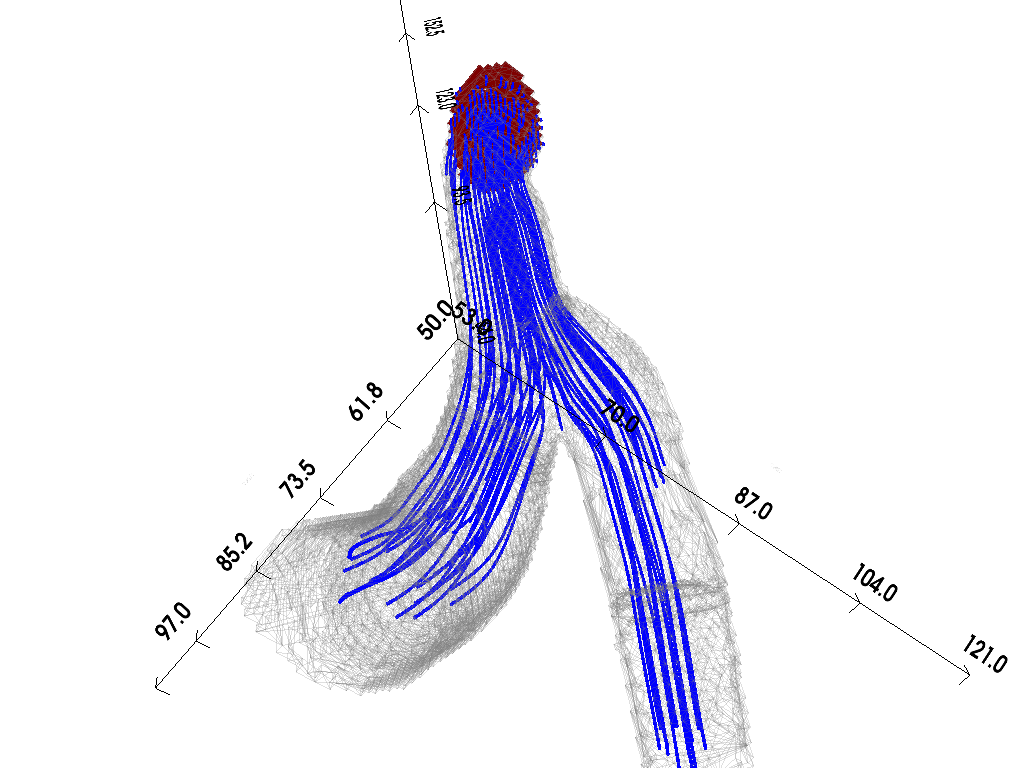

In [ ]:
# sargs = dict(vertical=True, title_font_size=16)
p = pv.Plotter()
p.show_bounds()
p.add_mesh(
    streamlines.tube(radius=0.2),
    # scalars="IntegrationTime",
    # clim=[0, 1000],
    lighting=False,
    # scalar_bar_args=sargs,
    color='blue'
)
p.add_mesh(boundary, color="grey", opacity=0.25)
p.add_mesh(source_mesh, color="red")
p.camera_position = [(10, 9.5, -43), (87.0, 73.5, 123.0), (-0.5, -0.7, 0.5)]
p.show()

## k3d-jupyter

In [ ]:
import k3d

In [ ]:
plot = k3d.plot(camera_auto_fit=False)
plot += k3d.vtk_poly_data(mesh.outline())
plot += k3d.vtk_poly_data(streamlines.tube(radius=0.2))

x_min, x_max, y_min, y_max, z_min, z_max = mesh.bounds
plot.camera = [(x_min + x_max) / 2, (y_min + y_max) / 2, z_max,
               (x_min + x_max) / 2, (y_min + y_max) / 2, (z_min + z_max) / 2,
               0, 1, 0]

plot.display()

Output()